# Praca domowa 2

## Autorzy: Jan Skwarek, Daniel Tytkowski

## Wstęp

Zacznijmy od zaimportowania niezbędnych pakietów.

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
# np.random.seed(23)

Zajmijmy się teraz naszym plikiem z danymi.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget http://download1503.mediafire.com/dp0sts2rcekg/9anh0e4165zmwcx/allegro-api-transactions.csv
allegro_df = pd.read_csv("allegro-api-transactions.csv")

--2022-03-25 13:28:31--  http://download1503.mediafire.com/dp0sts2rcekg/9anh0e4165zmwcx/allegro-api-transactions.csv
Resolving download1503.mediafire.com (download1503.mediafire.com)... 205.196.123.191
Connecting to download1503.mediafire.com (download1503.mediafire.com)|205.196.123.191|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.mediafire.com/download_repair.php?flag=3&dkey=dp0sts2rcek&qkey=9anh0e4165zmwcx&ip=35%2E196%2E238%2E74 [following]
--2022-03-25 13:28:31--  http://www.mediafire.com/download_repair.php?flag=3&dkey=dp0sts2rcek&qkey=9anh0e4165zmwcx&ip=35%2E196%2E238%2E74
Resolving www.mediafire.com (www.mediafire.com)... 104.16.203.237, 104.16.202.237
Connecting to www.mediafire.com (www.mediafire.com)|104.16.203.237|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘allegro-api-transactions.csv.1’

allegro-api-transac     [ <=>                ]  43.19K  --.-KB/s    in 0.01s   


ParserError: ignored

In [ ]:
allegro_df = pd.read_csv('/content/drive/MyDrive/allegro-api-transactions.csv')

Dokonajmy podziału na część testową oraz część do budowania.

In [ ]:
allegro_df_build = allegro_df.sample(frac=0.7, random_state=500)
allegro_df_validation = allegro_df.drop(allegro_df_build.index)
allegro_df_test = allegro_df_build.sample(frac=0.3, random_state=500)
allegro_df_build = allegro_df_build.drop(allegro_df_test.index)

Dokonajmy wstępnego przeglądu danych:

In [ ]:
allegro_df_build

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
180801,180801,2016-04-03 18:44:12,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,0,0,747,Miastko,Kolekcje
169056,169056,2016-04-03 18:01:31,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,0,0,4303,Warszawa,Uroda
168488,168488,2016-04-03 16:09:15,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje
59047,59047,2016-04-03 20:14:14,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama
69298,69298,2016-04-03 16:53:52,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,0,0,568,Tarnów,Muzyka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47298,47298,2016-04-03 13:30:41,6060699085,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i ...",1,1,Arek_Milkowski,10.00,0,20,0,367,WSCHOWA,Dom i Ogród
19298,19298,2016-04-03 20:10:45,6085705574,"['Fotografia', 'Obiektywy', 'Nikon']",1,1,juha2-foto,1349.00,1,0,0,947,Międzyrzec Podlaski,Fotografia
6633,6633,2016-04-03 11:21:11,4999195279,"['Komputery', 'Części do laptopów', 'Klawiatury']",1,1,KRZYMARK_ZDW,69.99,1,997,0,100041,Łódź,Komputery
59636,59636,2016-04-03 20:16:53,5973304699,"['Przemysł', 'Materiały i akcesoria', 'Budowni...",1,1,arbi1_2008,1.40,0,0,0,513,Cała Polska,Przemysł


In [ ]:
allegro_df_build.head(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
180801,180801,2016-04-03 18:44:12,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,0,0,747,Miastko,Kolekcje
169056,169056,2016-04-03 18:01:31,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,0,0,4303,Warszawa,Uroda
168488,168488,2016-04-03 16:09:15,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje
59047,59047,2016-04-03 20:14:14,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama
69298,69298,2016-04-03 16:53:52,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,0,0,568,Tarnów,Muzyka
194622,194622,2016-04-03 17:33:05,6001070212,"['Motoryzacja', 'Opony', 'Opony samochodowe', ...",1,1,wwwAUTO-RADpl,880.00,1,8,0,5821,Warszawa,Motoryzacja
117505,117505,2016-04-03 21:12:41,5687634664,"['Odzież, Obuwie, Dodatki', 'Odzież i bielizna...",1,1,MR-SPORT,117.99,0,210,0,45034,Bydgoszcz,"Odzież, Obuwie, Dodatki"
406589,406589,2016-04-03 15:12:34,5817896705,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Fol...",1,1,EKLIK_PL,19.99,1,986,0,26470,Zielona Góra,Telefony i Akcesoria
27867,27867,2016-04-03 18:55:11,6069971182,"['Książki i Komiksy', 'Poradniki i albumy', 'P...",1,1,korob_pl,19.99,1,51,0,228498,ŁÓDŹ,Książki i Komiksy
5192,5192,2016-04-03 18:33:49,5846536676,"['Motoryzacja', 'Części samochodowe', 'Wyposaż...",1,1,TRANS-POZ-SA,9.99,1,28,0,1899,Poznań,Motoryzacja


In [ ]:
allegro_df_build.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205810 entries, 180801 to 324976
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      205810 non-null  int64  
 1   date                    205810 non-null  object 
 2   item_id                 205810 non-null  int64  
 3   categories              205810 non-null  object 
 4   pay_option_on_delivery  205810 non-null  int64  
 5   pay_option_transfer     205810 non-null  int64  
 6   seller                  205810 non-null  object 
 7   price                   205810 non-null  float64
 8   it_is_allegro_standard  205810 non-null  int64  
 9   it_quantity             205810 non-null  int64  
 10  it_is_brand_zone        205810 non-null  int64  
 11  it_seller_rating        205810 non-null  int64  
 12  it_location             205810 non-null  object 
 13  main_category           205810 non-null  object 
dtypes: float64(1), 

In [ ]:
allegro_df_build.isnull().sum()

lp                        0
date                      0
item_id                   0
categories                0
pay_option_on_delivery    0
pay_option_transfer       0
seller                    0
price                     0
it_is_allegro_standard    0
it_quantity               0
it_is_brand_zone          0
it_seller_rating          0
it_location               0
main_category             0
dtype: int64

In [ ]:
np.where(allegro_df_build.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

Nie ma pustych stringów ani nulli. To oczywiście nie wyklucza istnienia innych braków danych, którymi zajmiemy się później.

## Analiza jednowymiarowa

Funkcja info() pokazała nam, że w zbiorze nie znajdują się nulle. Nie oznacza to jednak, że nie występują w nim braki danych (w postaci, być może, "śmieciowych wartości"). Przyjrzyjmy się każdej zmiennej (jest ich stosunkowo niewiele).

### lp

In [ ]:
allegro_df_build['lp'].unique().__len__()

205810

Zmienna unikalna dla każdego rekordu, nie bierzemy pod uwagę przy konstrukcji modelu.

### date

Również zmienna bez sensownego sastosowania w modelu.

In [ ]:
allegro_df_build["date"].value_counts()

2016-04-03 22:32:33    104
2016-04-03 20:16:26     71
2016-04-03 20:16:30     70
2016-04-03 20:48:32     60
2016-04-03 22:33:35     57
                      ... 
2016-04-03 02:18:59      1
2016-04-03 02:41:19      1
2016-04-03 16:35:40      1
2016-04-03 21:28:59      1
2016-04-03 10:59:28      1
Name: date, Length: 34446, dtype: int64

### item_id

Widzimy, że te same przedmioty pojawiają się kilka razy.

In [ ]:
allegro_df_build["item_id"].value_counts()

6061413744    53
6095133176    53
6091540894    45
5794943389    42
6073551689    41
              ..
6077806369     1
5077342534     1
6056857483     1
5614025785     1
5288105241     1
Name: item_id, Length: 177018, dtype: int64

In [ ]:
allegro_df_build.loc[allegro_df_build['item_id']==6061413744]

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
211961,211961,2016-04-03 19:45:55,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211939,211939,2016-04-03 23:47:36,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211978,211978,2016-04-03 20:18:40,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211964,211964,2016-04-03 19:28:37,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
212000,212000,2016-04-03 13:58:43,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211951,211951,2016-04-03 20:50:55,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211967,211967,2016-04-03 22:35:55,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
212019,212019,2016-04-03 20:52:52,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
212026,212026,2016-04-03 13:34:00,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"
211948,211948,2016-04-03 17:45:05,6061413744,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,1,SmA_adidas_orig,229.0,1,344,1,10470,Internet,"Odzież, Obuwie, Dodatki"


Widzimy, że ten sam produkt pojawia się w kilku ofertach. Właściwie są to te same oferty, różnią się tylko datą. Być może sensowne by było usunąć duplikaty.

In [ ]:
allegro_df_build.loc[:, ~allegro_df_build.columns.isin(['date','lp'])].drop_duplicates().__len__()

177018

Nie biorąc pod uwagę daty i lp zmniejszamy liczbę rekordów o prawie 50 tys.

In [ ]:
allegro_df_build = allegro_df_build.loc[:, ~allegro_df_build.columns.isin(['date','lp'])].drop_duplicates()

### categories

Rozbiciem list zajmiemy się przy zakodowywaniu.

In [ ]:
allegro_df_build["categories"].value_counts()

['Dom i Ogród', 'Ogród', 'Rośliny', 'Rośliny owocowe']                                   1247
['Dom i Ogród', 'Ogród', 'Rośliny', 'Bulwy, cebulki, kłącza']                            1089
['Odzież, Obuwie, Dodatki', 'Odzież damska', 'Sukienki']                                 1048
['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i krzewy liściaste']                         1022
['Telefony i Akcesoria', 'Akcesoria GSM', 'Folie ochronne na LCD']                        982
                                                                                         ... 
['Fotografia', 'Akcesoria fotograficzne', 'Filtry', 'Połówkowe']                            1
['Kolekcje', 'Filatelistyka', 'Polska', '1939 - 1945 Emigracja']                            1
['Motoryzacja', 'Samochody', 'Osobowe', 'Toyota', 'Corolla', 'Seria E11 (1997-2002)']       1
['Telefony i Akcesoria', 'Telefony komórkowe', 'Prestigio']                                 1
['Sport i Turystyka', 'Sporty wodne', 'Nurkowanie', 'Butle i

### pay_option_on_delivery

In [ ]:
allegro_df_build["pay_option_on_delivery"].value_counts()

1    155976
0     21042
Name: pay_option_on_delivery, dtype: int64

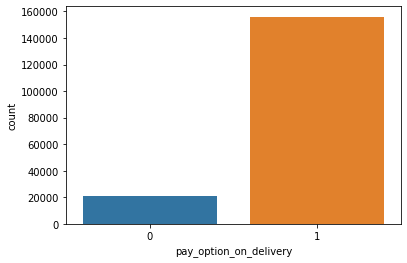

In [ ]:
sns.countplot(data=allegro_df_build, x="pay_option_on_delivery")

### pay_option_transfer

In [ ]:
allegro_df_build["pay_option_transfer"].value_counts()

1    144335
0     32683
Name: pay_option_transfer, dtype: int64

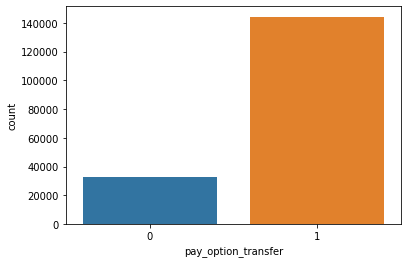

In [ ]:
sns.countplot(data=allegro_df_build, x="pay_option_transfer")

### seller

In [ ]:
allegro_df_build["seller"].value_counts()

Allegro          517
ezebra_pl        380
darmarsklep      374
Aros_pl          364
sklepogrodnik    362
                ... 
agula_dawid21      1
dobryszrot         1
zuuuza             1
jewelryluxury      1
juha2-foto         1
Name: seller, Length: 37444, dtype: int64

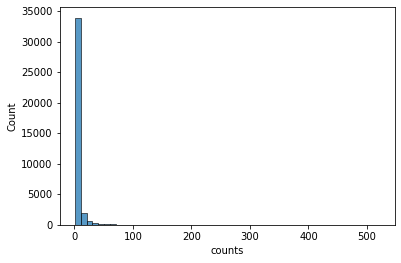

In [ ]:
sns.histplot(data=allegro_df_build.groupby(["seller"]).size().reset_index(name="counts"),x="counts", binwidth=10)

In [ ]:
df2 = allegro_df_build.groupby(["seller"]).size().reset_index(name="counts").sort_values(by="counts", ascending=False)
df2.loc[df2['counts']<15].__len__()/43862

0.8001231134011217

80% sprzedawców ma poniżej 15 ofert. Jest to wynik po odrzuceniu ofert z tymi samymi przedmiotami.

### price

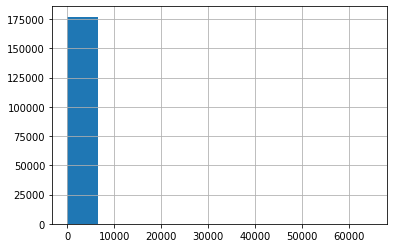

In [ ]:
allegro_df_build["price"].hist()

In [ ]:
allegro_df_build["price"].sort_values().value_counts()

1.00        3195
9.99        1900
19.99       1777
15.00       1495
99.00       1430
            ... 
77.75          1
77.79          1
77.87          1
77.88          1
64900.00       1
Name: price, Length: 7463, dtype: int64

In [ ]:
allegro_df_build["price"].eq(0).sum()

16

In [ ]:
allegro_df_build["price"].describe()

count    177018.000000
mean         77.664243
std         331.683742
min           0.000000
25%           9.000000
50%          24.990000
75%          68.000000
max       64900.000000
Name: price, dtype: float64

### it_is_allegro_standard

In [ ]:
allegro_df_build["it_is_allegro_standard"].value_counts()

1    104173
0     72845
Name: it_is_allegro_standard, dtype: int64

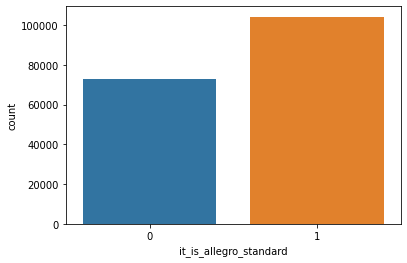

In [ ]:
sns.countplot(data=allegro_df_build, x="it_is_allegro_standard")

### it_quantity

In [ ]:
allegro_df_build["it_quantity"].value_counts()

0        29065
1         5317
2         4118
3         3362
4         3212
         ...  
98070        1
7376         1
8681         1
8865         1
19958        1
Name: it_quantity, Length: 6236, dtype: int64

In [ ]:
allegro_df_build["it_quantity"].describe()

count    177018.000000
mean       5439.923968
std       21170.842412
min           0.000000
25%           4.000000
50%          72.000000
75%         895.000000
max       99999.000000
Name: it_quantity, dtype: float64

In [ ]:
allegro_df_build["it_quantity"].eq(0).sum()

29065

Aż 40 tysięcy zer. Później zastanowimy się co z nimi zrobić.

In [ ]:
allegro_df_build["it_quantity"].eq(99999).sum()

175

Być może zmienna ta została zczapkowana.

1


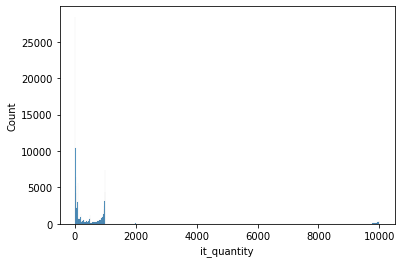

In [ ]:
it_quantities = allegro_df_build['it_quantity']

upper_lim =it_quantities.quantile(.95)
lower_lim =it_quantities.quantile(.05)

data_percentile2 =it_quantities[(it_quantities < upper_lim) & (it_quantities > lower_lim)]
print(data_percentile2.min())
sns.histplot(data=data_percentile2,binwidth=10)
#istnieje kilka większych cen które powodują rozjechanie wykresu
#ucinając kawałek danych nadal są one brane pod uwagę 

1


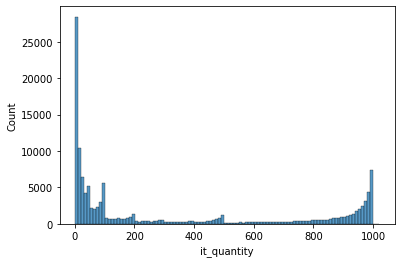

In [ ]:
upper_lim =it_quantities.quantile(.90)
lower_lim =it_quantities.quantile(.05)

data_percentile2 =it_quantities[(it_quantities < upper_lim) & (it_quantities > lower_lim)]
print(data_percentile2.min())
sns.histplot(data=data_percentile2,binwidth=10)
#ucinając więcej danych zyskujemy ładny histogram

### it_is_brand_zone

In [ ]:
allegro_df_build["it_is_brand_zone"].value_counts()

0    174421
1      2597
Name: it_is_brand_zone, dtype: int64

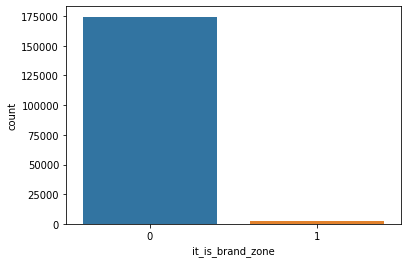

In [ ]:
sns.countplot(data=allegro_df_build, x="it_is_brand_zone")

### it_seller_rating

In [ ]:
allegro_df_build["it_seller_rating"].value_counts()

0        240
1        165
2        161
6        143
4        136
        ... 
38819      1
12259      1
43924      1
59067      1
54910      1
Name: it_seller_rating, Length: 37398, dtype: int64

In [ ]:
allegro_df_build["it_seller_rating"].describe()

count    177018.000000
mean      19074.837384
std       35251.637181
min          -1.000000
25%        1473.000000
50%        6210.000000
75%       19616.750000
max      292074.000000
Name: it_seller_rating, dtype: float64

In [ ]:
allegro_df_build["it_seller_rating"].lt(0).sum()

3

Tylko cztery spośród wszystkich rekordów zawierają wartości ujemne. Za każdym razem jest to liczba "-1". Później zastanowimy się dlaczego.

### it_location

In [ ]:
allegro_df_build["it_location"].value_counts()

Warszawa              10196
Kraków                 6554
Łódź                   4556
Poznań                 4332
Wrocław                3728
                      ...  
Mragowo                   1
JÓZEFÓW (WARSZAWA)        1
Gąsiorowice               1
Gorzów WIELKPOLSKI        1
Oslztyn                   1
Name: it_location, Length: 7983, dtype: int64

Wstępny pomysł pod przyszłą obróbkę i wykrywanie "śmieciowych" wartości.

In [ ]:
# fake_values1 = '!"#$%&\'()*+.:;<=>?@[\\]^_`{|}~@'
# fake_values2 = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ 1234567890'
# tmp1 = allegro_df_build["it_location"].map((lambda v: any(char in v for char in fake_values1)))


### main_category

In [ ]:
allegro_df_build["main_category"].value_counts()

Dom i Ogród                            37407
Odzież, Obuwie, Dodatki                22229
Motoryzacja                            20778
Dla Dzieci                             17864
Sport i Turystyka                      11742
Uroda                                  11203
RTV i AGD                               8600
Telefony i Akcesoria                    7990
Komputery                               5804
Książki i Komiksy                       5454
Zdrowie                                 5323
Delikatesy                              3359
Rękodzieło                              3010
Kolekcje                                2876
Przemysł                                2735
Biżuteria i Zegarki                     2602
Gry                                     2571
Biuro i Reklama                         1450
Fotografia                              1061
Muzyka                                   935
Antyki i Sztuka                          602
Filmy                                    484
Konsole i 

## Braki danych

Wstępna analiza jednowymiarowa pokazała nam braki danych w czterech miejscach:
1. Zmienna "price" przyjmuje wartości zerowe.
2. Zmienna "it_quanity" przyjmuje wartości zerowe.
3. Zmienna "it_seller_rating" przyjmuje wartości ujemne.
4. Zmienna "it_location" zawiera dużo błędnych danych (prawdopodobnie użytkownik mógł ustawić tę wartość na dowolny ciąg charów ASCII).

### price

Zmienna "price" przyjmuje w niektórych miejscach wartości zerowe. Jest to dość zastanawiające i problematyczne. Na Allegro nie ma darmowych artykułów. Może to wynikać z tego, że niektóre oferty miały tak naprawdę charakter ogłoszeń (być może przekierowujących do innego serwisu lub zawierające kontakt do sprzedającego).

In [ ]:
allegro_df_build["price"].eq(0).sum()

16

Mamy dwadzieścia dwie wartości zerowe w kolumnie "price". Przyjrzyjmy się niektórym z nich.

In [ ]:
price_zero = allegro_df_build.loc[allegro_df_build["price"] == 0]
price_zero.head()

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
363166,6095529423,"['Dla Dzieci', 'Odzież', 'Kurtki, płaszcze', '...",0,1,Dajdi83,0.0,0,0,0,4,Gdańsk,Dla Dzieci
243672,6098659857,"['Gry', 'Komputerowe PC', 'Strzelaniny']",0,1,mall94,0.0,0,0,0,29,Warszawa,Gry
417758,6084335204,"['Fotografia', 'Sprzęt optyczny', 'Noktowizory']",1,0,10Perkoz,0.0,0,0,0,150,Inowrocław,Fotografia
45669,6096818482,"['Książki i Komiksy', 'Czasopisma', 'Internet,...",1,1,jsandd,0.0,0,0,0,0,Warszawa,Książki i Komiksy
247789,6099846259,"['Telefony i Akcesoria', 'Telefony komórkowe',...",0,0,marcin87gdynia,0.0,0,0,0,4,GDYNIA,Telefony i Akcesoria


Nic ciekawego z tego nie wynika. Skoro kolumn jest bardzo mała ilość - można je usunąć.

In [ ]:
allegro_df_build_fixed = allegro_df_build[allegro_df_build.price != 0]
print(allegro_df_build_fixed.shape)
print(allegro_df_build.shape)
allegro_df_build_fixed.head()

(177002, 12)
(177018, 12)


,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
180801,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,0,0,747,Miastko,Kolekcje
169056,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,0,0,4303,Warszawa,Uroda
168488,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje
59047,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama
69298,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,0,0,568,Tarnów,Muzyka


Postanowiliśmy usunąć te "problematyczne" rzędy. Istnieje jednak oczywiście możliwość, że wystawione przedmioty faktycznie były dostępne za darmo. W takim wypadku nie można uznać tego za brak danych. Nie mają jednak wtedy one żadnej wartości predykcyjnej, jest ich bardzo mało, więc postanowiliśmy je po prostu usunąć. Dlaczego nie wstawiliśmy mediany lub następnej najmniejszej wartości? Postanowiliśmy, że lepiej będzie jej usunąć, ponieważ są to dane wątpliwej wartości - prawdopodobnie niezgodne z regulaminem Allegro (skoro jest ich tak mało w momencie pobrania zbioru, dane z "price" = 0 mogą być szybko usuwane). Jak już wspomnieliśmy wcześniej mogą być to po prostu ogłoszenia, czy inny spam przekierowujący w inne miejsce, który nie został jeszcze zdjęty z serwisu.

### it_quantity

Kolejną problematyczną zmienną jest zmienna "it_quantity". Również zawiera ona zera - jest to conajmniej dziwne. Nie można sprzedać przedmiotu, który nie istnieje.

In [ ]:
allegro_df_build["it_quantity"].eq(0).sum()

29065

Mamy bardzo dużo takich rekordów. Oznacza to, że jest to wręcz trend na Allegro. Być może jest to domyślna wartość przy wystawieniu przedmiotu.

In [ ]:
allegro_df_build["it_quantity"].eq(99999).sum()

175

 Z kolei 99999 to maksymalna wartość jaką może przyjąć ta zmienna. Może to oznaczać sczapeczkowanie. Nie jest to jednak brak danych.

In [ ]:
allegro_df_build["it_quantity"].value_counts()

0        29065
1         5317
2         4118
3         3362
4         3212
         ...  
98070        1
7376         1
8681         1
8865         1
19958        1
Name: it_quantity, Length: 6236, dtype: int64

Mamy kilka ścieżek do wyboru. Możemy te wartości zostawić, możemy zastąpić je modą (następną najpopularniejszą wartością), możemy też użyć średniej. My, biorąc pod uwagę wszystki czynniki, zdecydowaliśmy się zastąpić te zera następną najpopularniejszą wartością, a więc jedynką. Mogłoby się wydawać z autopsji, że serwis Allegro jest zdominowany przez ogłoszenia odnośnie sprzedaży pojedyńczych przedmiotów - zbiór jednak pokazuje coś diametralnie innego. Jeżeli "zero" to domyślna wartość proponowana przez serwis, to całkiem możliwe, że osoby, które nie prowadzą sklepu, chcą po prostu sprzedać pojedynczy przedmiot, po prostu zostawiają to pole puste. Wstawienie więc w miejsce zera kolejnej najpopularniejszej wartości (którą szczęśliwie jest jedynka) ma według nas lepsze uzasadnienie odzwierciedlające rzeczywistość niż wstawienie mediany (która wynosi prawie 7 tysięcy)). Rzędów jest na tyle dużo, że nie ma mowy o ich usunięciu.

In [ ]:
#allegro_df_build_fixed2 = allegro_df_build.loc[allegro_df_build["it_quantity"] ==  0]
#allegro_df_build_fixed2 = allegro_df_build
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_quantity"] == 0, "it_quantity"] = 1
allegro_df_build_fixed.head()

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
180801,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,1,0,747,Miastko,Kolekcje
169056,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,1,0,4303,Warszawa,Uroda
168488,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje
59047,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama
69298,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,1,0,568,Tarnów,Muzyka


In [ ]:
allegro_df_build_fixed["it_quantity"].value_counts()

1        34366
2         4118
3         3362
4         3212
9         2504
         ...  
98070        1
7376         1
8681         1
8865         1
19958        1
Name: it_quantity, Length: 6235, dtype: int64

### it_seller_rating

Kolumna "it_seller_rating" zawiera kilka wartości ujemnych.

In [ ]:
allegro_df_build["it_seller_rating"].lt(0).sum()

3

Ciężko powiedzieć co to oznacza. Mogą być to konta usunięte, zbanowane, może być też to swojego rodzaju bug. Jest tylko sześć takich ogłoszeń. Nie wiemy jednak co to w ogólnym wypadku oznacza więc najrozsądniej będzie podnieść te problematyczne wartości ujemne do zera. Warto dodać, że wszystki te wartości ujemne to liczby "-1". Być może sensownie byłoby też usunąć rzędy z takimi wartościami (jest ich zaledwie sześć).

In [ ]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_seller_rating"].lt(0), "it_seller_rating"] = 0
allegro_df_build_fixed["it_seller_rating"].describe()

count    177002.000000
mean      19076.554451
std       35252.767754
min           0.000000
25%        1473.000000
50%        6211.000000
75%       19619.750000
max      292074.000000
Name: it_seller_rating, dtype: float64

### it_location

Kolumna "it_location" zawiera dużo "śmieciowych" wartości. Użytkownicy prawdopodobnie mogli nadawać tej zmiennej wartości samodzielnie poprzez wpisanie dowolnego ciągu charów ASCII z klawiatury.

In [ ]:
(allegro_df_build_fixed.it_location == "Londyn").sum()

14

Trudno oszacować w tym wypadku braki danych. W zbiorze znajdują się również zagraniczne adresy, a nie sposób jest znać wszystkie miasta na świecie. Ciężko jest nam stwiedzić czy "Hjingwan" to przypadkowy ciąg znaków, czy może jakieś miasto w Chinach. Musimy więc przepuszczać każdą wartość, która zawiera litery. Odrzucić natomiast można z całą pewnością puste stringi oraz takie, które zawierają tylko i wyłącznie znaki interpunkcyjne czy same liczby.

In [ ]:
allegro_df_build_fixed["it_location_raw"] = allegro_df_build_fixed['it_location'].str.replace('[^\w\s]','')
print((allegro_df_build_fixed.it_location_raw == "").sum())
allegro_df_build_fixed.it_location_raw = allegro_df_build_fixed.it_location_raw.str.replace(' ', '')
print((allegro_df_build_fixed.it_location_raw == "").sum())
allegro_df_build_fixed.it_location_raw = allegro_df_build_fixed.it_location_raw.str.replace('\d+', '')
print((allegro_df_build_fixed.it_location_raw == "").sum())

906
907
913


Mamy 1392 wiersze, w których znajdują się jedynie znaki interpunkcyjne i liczby. Możemy je usunąć.

In [ ]:
print(allegro_df_build_fixed.shape)
allegro_df_build_fixed = allegro_df_build_fixed[allegro_df_build_fixed.it_location_raw != ""]
print(allegro_df_build_fixed.shape)

(177002, 13)
(176089, 13)


## Przekształcenie zmiennych ciągłych na kategoryczne

### Zakodowanie zmiennej celu

Robimy to dzieląć na 3 części funkcją pd.qcut.

In [ ]:
allegro_df_build_fixed['priceEncoded']=pd.qcut(allegro_df_build_fixed['price'], q=3,labels=False)
allegro_df_build_fixed.head(10)

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,it_location_raw,priceEncoded
180801,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,1,0,747,Miastko,Kolekcje,Miastko,0
169056,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,1,0,4303,Warszawa,Uroda,Warszawa,1
168488,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje,Krosno,0
59047,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama,Głuchołazy,0
69298,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,1,0,568,Tarnów,Muzyka,Tarnów,1
194622,6001070212,"['Motoryzacja', 'Opony', 'Opony samochodowe', ...",1,1,wwwAUTO-RADpl,880.00,1,8,0,5821,Warszawa,Motoryzacja,Warszawa,2
117505,5687634664,"['Odzież, Obuwie, Dodatki', 'Odzież i bielizna...",1,1,MR-SPORT,117.99,0,210,0,45034,Bydgoszcz,"Odzież, Obuwie, Dodatki",Bydgoszcz,2
406589,5817896705,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Fol...",1,1,EKLIK_PL,19.99,1,986,0,26470,Zielona Góra,Telefony i Akcesoria,ZielonaGóra,1
27867,6069971182,"['Książki i Komiksy', 'Poradniki i albumy', 'P...",1,1,korob_pl,19.99,1,51,0,228498,ŁÓDŹ,Książki i Komiksy,ŁÓDŹ,1
5192,5846536676,"['Motoryzacja', 'Części samochodowe', 'Wyposaż...",1,1,TRANS-POZ-SA,9.99,1,28,0,1899,Poznań,Motoryzacja,Poznań,0


### Zakodowanie it_seller_rating i it_quantity

W analogiczny sposób. Możemy podzielić na więcej kwantyli.

In [ ]:
allegro_df_build_fixed['it_quantityEncoded']=pd.qcut(allegro_df_build_fixed['it_quantity'], q=5,labels=False)
allegro_df_build_fixed['it_seller_ratingEncoded']=pd.qcut(allegro_df_build_fixed['it_seller_rating'], q=5,labels=False)

In [ ]:
allegro_df_build_fixed

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,it_location_raw,priceEncoded,it_quantityEncoded,it_seller_ratingEncoded
180801,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,1,0,747,Miastko,Kolekcje,Miastko,0,0,0
169056,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,1,0,4303,Warszawa,Uroda,Warszawa,1,0,2
168488,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje,Krosno,0,4,3
59047,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama,Głuchołazy,0,4,1
69298,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,1,0,568,Tarnów,Muzyka,Tarnów,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47298,6060699085,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i ...",1,1,Arek_Milkowski,10.00,0,20,0,367,WSCHOWA,Dom i Ogród,WSCHOWA,0,1,0
19298,6085705574,"['Fotografia', 'Obiektywy', 'Nikon']",1,1,juha2-foto,1349.00,1,1,0,947,Międzyrzec Podlaski,Fotografia,MiędzyrzecPodlaski,2,0,0
6633,4999195279,"['Komputery', 'Części do laptopów', 'Klawiatury']",1,1,KRZYMARK_ZDW,69.99,1,997,0,100041,Łódź,Komputery,Łódź,2,4,4
59636,5973304699,"['Przemysł', 'Materiały i akcesoria', 'Budowni...",1,1,arbi1_2008,1.40,0,1,0,513,Cała Polska,Przemysł,CałaPolska,0,0,0


## Zakodowanie zmiennych kategorycznych

### main_category i categories

main_category to poprostu pierwsza wartość z ciągu kategorii z kolumny categories. Możemy zejść do drugiego poziomu i zakodować Binary Encodem nazwę drugiej kategorii. Stosując inne podjeście moglibyśmy zejść jeszcze niżej i np. zastępować nazwę kategorii medianą lub średnią ceną w danej kategorii, potem podzielić jak zmienną celu lub na więcej kategorii. I tak i tak musimy zacząć od utworzenia list danych poziomów kategorii. Problem nastąpi przy schodzniu niżej niż dwie kategorie, ponieważ najkrótsze listy kategorii są długości 2. Inny problem pojawiłby się przy takim podejściu gdyby w danych testowych pojawiły się nowe kategorie. Dodatkowo jest wiele kategorii w których jest tylko jedna oferta. Plusem zakodowania jako średnia cena jest połączenie kategorii w podobne grupy cenowe.

Main_category możemy zakodować jako średnia cena tej kategorii.

In [ ]:
import ast
mainCategories = []
Categories2 = []
for cat in allegro_df_build_fixed['categories']:
    listka = ast.literal_eval(cat)
    mainCategories.append(listka[0])
    Categories2.append(listka[1])

In [ ]:
allegro_df_build_fixed['second_categoryy'] = Categories2

In [ ]:
pd.Series(Categories2).unique().__len__()

262

In [ ]:
allegro_df_build_fixed.head()

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,it_location_raw,priceEncoded,it_quantityEncoded,it_seller_ratingEncoded,second_categoryy
180801,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,1,0,747,Miastko,Kolekcje,Miastko,0,0,0,Birofilistyka
169056,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,1,0,4303,Warszawa,Uroda,Warszawa,1,0,2,Kosmetyki pielęgnacyjne
168488,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,Krosno,Kolekcje,Krosno,0,4,3,Modelarstwo
59047,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,Głuchołazy,Biuro i Reklama,Głuchołazy,0,4,1,Artykuły piśmiennicze
69298,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,1,0,568,Tarnów,Muzyka,Tarnów,1,0,0,Płyty kompaktowe


In [ ]:
median_encode = allegro_df_build_fixed.groupby('main_category')['price'].median()
allegro_df_build_fixed.loc[:,'main_categoryMedian'] = allegro_df_build_fixed['main_category'].map(median_encode)
allegro_df_build_fixed['main_categoryEncoded']=pd.qcut(allegro_df_build_fixed['main_categoryMedian'], q=5,labels=False)

In [ ]:
median_encode2 = allegro_df_build_fixed.groupby('second_categoryy')['price'].median()
allegro_df_build_fixed.loc[:,'second_categoryMedian'] = allegro_df_build_fixed['second_categoryy'].map(median_encode2)
allegro_df_build_fixed['second_categoryEncoded']=pd.qcut(allegro_df_build_fixed['second_categoryMedian'], q=5,labels=False)

In [ ]:
allegro_df_build_fixed

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,...,main_category,it_location_raw,priceEncoded,it_quantityEncoded,it_seller_ratingEncoded,second_categoryy,main_categoryMedian,main_categoryEncoded,second_categoryMedian,second_categoryEncoded
180801,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,1,0,747,...,Kolekcje,Miastko,0,0,0,Birofilistyka,12.000,0,5.00,0
169056,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,1,0,4303,...,Uroda,Warszawa,1,0,2,Kosmetyki pielęgnacyjne,15.900,0,19.02,1
168488,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,...,Kolekcje,Krosno,0,4,3,Modelarstwo,12.000,0,20.00,1
59047,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,...,Biuro i Reklama,Głuchołazy,0,4,1,Artykuły piśmiennicze,10.990,0,5.39,0
69298,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,1,0,568,...,Muzyka,Tarnów,1,0,0,Płyty kompaktowe,28.660,2,27.70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47298,6060699085,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i ...",1,1,Arek_Milkowski,10.00,0,20,0,367,...,Dom i Ogród,WSCHOWA,0,1,0,Ogród,18.500,0,11.99,0
19298,6085705574,"['Fotografia', 'Obiektywy', 'Nikon']",1,1,juha2-foto,1349.00,1,1,0,947,...,Fotografia,MiędzyrzecPodlaski,2,0,0,Obiektywy,30.500,3,510.00,4
6633,4999195279,"['Komputery', 'Części do laptopów', 'Klawiatury']",1,1,KRZYMARK_ZDW,69.99,1,997,0,100041,...,Komputery,Łódź,2,4,4,Części do laptopów,36.900,3,49.00,4
59636,5973304699,"['Przemysł', 'Materiały i akcesoria', 'Budowni...",1,1,arbi1_2008,1.40,0,1,0,513,...,Przemysł,CałaPolska,0,0,0,Materiały i akcesoria,16.995,0,13.50,1


### seller

In [ ]:
allegro_df_build_fixed.groupby(["seller"]).size().reset_index(name="counts").sort_values(by="counts", ascending=False).head(10)

,seller,counts
1650,Allegro,666
1968,Aros_pl,518
24273,ezebra_pl,491
38285,sklepogrodnik,470
2343,BENEK195,467
21752,darmarsklep,462
28858,kosmetyki_ck,381
33088,motostacja_pl,380
28820,korob_pl,340
14176,Swip_2009,339


Napewno nie musimy każdego sprzedawcy zakodowaywać unikalnymi wartościami. Największy sprzedawca ma około blisko 500 ofert. Jednocześnie większość sprzedawców ma bardzo mało ofert. Ci więksi to mogą być sklepy z różnymi produktami. Wydaję się, że to słaba zmienna. Raczej nie ma dużego wpływu na model. Znów moglibyśmy zakodować sprzedawce jako średnia cena jego produktów. Jednak może dojść dużo nowych sprzedawców i nie będzie wiadomo jak ich zakodować w danych w których trzeba cenę przewidzieć. Nie bierzemy tej zmiennej pod uwagę w modelu.

### It_location

Zacznijmy od małego preprocessingu. Pogrupujmy nazwy ozanaczające de facto to samo do jednej kategorii.

In [ ]:
allegro_df_build_fixed["it_location"].value_counts().index.tolist()[:30]

['Warszawa',
 'Kraków',
 'Łódź',
 'Poznań',
 'Wrocław',
 'Białystok',
 'Lublin',
 'Rzeszów',
 'Częstochowa',
 'Kielce',
 'Gdańsk',
 'Szczecin',
 'Internet',
 'Katowice',
 'Bydgoszcz',
 'INTERNET',
 'Koszalin',
 'Zielona Góra',
 'Gdynia',
 'WARSZAWA',
 'internet',
 'Bielsko-Biała',
 'Radom',
 'Dębica',
 'Cała Polska',
 'Polska',
 'Chrzypsko Wielkie',
 'Toruń',
 'Tarnów',
 'Olsztyn']

In [ ]:
allegro_df_build_fixed["it_location"].value_counts().values.tolist()[:30]

[10193,
 6554,
 4556,
 4332,
 3726,
 3004,
 2761,
 2463,
 2461,
 2163,
 1736,
 1700,
 1639,
 1558,
 1532,
 1479,
 1340,
 1307,
 1241,
 1060,
 1051,
 990,
 914,
 913,
 892,
 852,
 797,
 768,
 752,
 712]

"WARSZAWA" oznacza to samo co "Warszawa". Wrzućmy tego typu rekordy do jednej kategorii. Postąpmy podobnie dla czterech kolejnych (nie licząc Warszawy) najpopularniejszych wartości zmiennej.

In [ ]:
locations = allegro_df_build_fixed[['it_location']].groupby(['it_location']).size().sort_values(ascending=False).reset_index()
locations.columns = ['it_location', 'count']
locations.loc[locations['it_location'].apply(lambda x:'warszawa' in x.lower())]

,it_location,count
0,Warszawa,10193
19,WARSZAWA,1060
41,warszawa,506
373,"Warszawa, Katowice",69
452,Warszawa-Halinów,58
...,...,...
7935,WARSZAWA-RADOŚĆ UL.LEWKONII 5,1
7936,WARSZAWA-URSYNOW,1
7937,WARSZAWA/ Kołaków,1
7941,WArszawa,1


Cztery najpopularniejsze tutaj wartości wyglądają na to samo. Inne mają niekiedy podane kilka miast lub wsie pod Warszawą, więc lepiej nic z nimi nie robić. Oczywiście rozwiązanie zaprezentowane tutaj to tak zwane "szybkie rozwiązanie". Gdyby mielibyśmy większy zasób czasowy to prawdopodobnie pobralibyśmy ramkę danych z miastami i ich wielkościami i pogrupowalibyśmy po wielkości miejsca zamieszkania.

In [ ]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "WARSZAWA", "it_location"] = "Warszawa"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "warszawa", "it_location"] = "Warszawa"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Warszawa/ Sprzedaż tylko wysyłkowa", "it_location"] = "Warszawa"

In [ ]:
allegro_df_build_fixed["it_location"].value_counts()

Warszawa               11811
Kraków                  6554
Łódź                    4556
Poznań                  4332
Wrocław                 3726
                       ...  
ZIELONKA                   1
Poznań Luboń               1
Trójmiasto i Żukowo        1
Wyspy Dziewicze            1
Oslztyn                    1
Name: it_location, Length: 7947, dtype: int64

In [ ]:
locations = allegro_df_build_fixed[['it_location']].groupby(['it_location']).size().sort_values(ascending=False).reset_index()
locations.columns = ['it_location', 'count']
locations.loc[locations['it_location'].apply(lambda x:'kraków' in x.lower())]

,it_location,count
1,Kraków,6554
38,KRAKÓW,524
228,kraków,112
338,Kraków al. Słowackiego 40/1,75
390,"Kraków, ul. Krupnicza 5/1",67
...,...,...
7817,"Kraków,Bielsko Biała,Rzeszów",1
7820,"Kraków, ul.Lea 137- wysyłka kraj",1
7834,Krosno Kraków Tarnów Rzeszów,1
7885,"Leńcze, Skawina ok. Kraków",1


In [ ]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "KRAKÓW", "it_location"] = "Kraków"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "kraków", "it_location"] = "Kraków"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Kraków al. Słowackiego 40/1", "it_location"] = "Kraków"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Krakow", "it_location"] = "Kraków"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "krakow", "it_location"] = "Kraków"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "KRAKOW", "it_location"] = "Kraków"

In [ ]:
locations = allegro_df_build_fixed[['it_location']].groupby(['it_location']).size().sort_values(ascending=False).reset_index()
locations.columns = ['it_location', 'count']
locations.loc[locations['it_location'].apply(lambda x:'łódź' in x.lower())]

,it_location,count
2,Łódź,4556
33,ŁÓDŹ,604
385,łódź,67
426,Kraków Łódź,60
595,"Tomaszów Mazowiecki, Łódź",41
...,...,...
7400,KATOWICE KRAKÓW TARNÓW ŁÓDŹ,1
7401,KATOWICE KRAKÓW TARNÓW WROCŁAW ŁÓDŹ,1
7523,RADOM WARSZAWA LUBLIN ŁÓDŹ KIELCE,1
7743,WARSZAWA GDAŃSK KRAKÓW ŁÓDŹ POZNAŃ,1


In [ ]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "ŁÓDŹ", "it_location"] = "Łódź"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "łódź", "it_location"] = "Łódź"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "lodz", "it_location"] = "Łódź"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Lodz", "it_location"] = "Łódź"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "LODZ", "it_location"] = "Łódź"

In [ ]:
locations = allegro_df_build_fixed[['it_location']].groupby(['it_location']).size().sort_values(ascending=False).reset_index()
locations.columns = ['it_location', 'count']
locations.loc[locations['it_location'].apply(lambda x:'poznań' in x.lower())]

,it_location,count
3,Poznań,4332
109,POZNAŃ,202
497,poznań,51
666,Poznań-Skórzewo,37
1089,"Poznań, ul. Obornicka 337",19
...,...,...
7740,WARSZAWA GDAŃSK KRAKÓW ŁÓDŹ POZNAŃ,1
7798,"Kraków,Poznań,Częstochowa",1
7862,LUBOŃ/POZNAŃ,1
7880,Leszno Poznań,1


In [ ]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "POZNAŃ", "it_location"] = "Poznań"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "poznan", "it_location"] = "Poznań"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Poznan", "it_location"] = "Poznań"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "poznań", "it_location"] = "Poznań"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Poznań, ul. Obornicka 337", "it_location"] = "Poznań"

In [ ]:
locations = allegro_df_build_fixed[['it_location']].groupby(['it_location']).size().sort_values(ascending=False).reset_index()
locations.columns = ['it_location', 'count']
locations.loc[locations['it_location'].apply(lambda x:'wrocław' in x.lower())]

,it_location,count
4,Wrocław,3726
51,WROCŁAW,403
86,Inowrocław,252
201,wrocław,129
404,Czernica koło Wrocławia,62
...,...,...
7750,WARSZAWA WROCŁAW,1
7803,WROCŁAW,1
7804,WROCŁAW / OLEŚNICA,1
7855,Legnica Wrocław,1


In [ ]:
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "WROCŁAW", "it_location"] = "Wrocław"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "wrocław", "it_location"] = "Wrocław"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "wroclaw", "it_location"] = "Wrocław"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "Wroclaw", "it_location"] = "Wrocław"
allegro_df_build_fixed.loc[allegro_df_build_fixed["it_location"] == "WROCLAW", "it_location"] = "Wrocław"

In [ ]:
allegro_df_build_fixed["it_location"].value_counts()

Warszawa                            11811
Kraków                               7420
Łódź                                 5273
Poznań                               4701
Wrocław                              4364
                                    ...  
Gliwice, Daszyńskiego 8                 1
Stanisławów Pierwszy gm.Nieporęt        1
schodnia nowa                           1
SMIGIEL                                 1
Oslztyn                                 1
Name: it_location, Length: 7926, dtype: int64

In [ ]:
allegro_df_build_fixed.loc[~allegro_df_build_fixed.it_location.isin(["Warszawa", "Wrocław", "Łódź", "Kraków", "Poznań"]), "it_location"] = "Other"

Jakby było więcej czasu, uogólnilibyśmy ten algorytm, żeby możliwie dla wszystkich miast tworzył poprawne nazwy.

In [ ]:
allegro_df_build_fixed["it_location"].value_counts()

Other       142520
Warszawa     11811
Kraków        7420
Łódź          5273
Poznań        4701
Wrocław       4364
Name: it_location, dtype: int64

Zakodowanie label encoderem

In [ ]:
! pip install category_encoders 
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

     |████████████████████████████████| 86 kB 3.1 MB/s 


In [ ]:
allegro_df_build_fixed['it_location'] = LabelEncoder().fit_transform(allegro_df_build_fixed.it_location)
allegro_df_build_fixed

,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,...,main_category,it_location_raw,priceEncoded,it_quantityEncoded,it_seller_ratingEncoded,second_categoryy,main_categoryMedian,main_categoryEncoded,second_categoryMedian,second_categoryEncoded
180801,6095890163,"['Kolekcje', 'Birofilistyka', 'Gadżety piwne']",0,1,Afrikakorps1,4.00,0,1,0,747,...,Kolekcje,Miastko,0,0,0,Birofilistyka,12.000,0,5.00,0
169056,5813383000,"['Uroda', 'Kosmetyki pielęgnacyjne', 'Ciało', ...",1,1,kosmet_galeria,14.95,1,1,0,4303,...,Uroda,Warszawa,1,0,2,Kosmetyki pielęgnacyjne,15.900,0,19.02,1
168488,5152635000,"['Kolekcje', 'Modelarstwo', 'Materiały modelar...",1,1,modelas123,7.80,0,970,0,20202,...,Kolekcje,Krosno,0,4,3,Modelarstwo,12.000,0,20.00,1
59047,5604048299,"['Biuro i Reklama', 'Artykuły piśmiennicze', '...",1,1,papiermix-pl,3.30,0,971,0,3572,...,Biuro i Reklama,Głuchołazy,0,4,1,Artykuły piśmiennicze,10.990,0,5.39,0
69298,6097217991,"['Muzyka', 'Płyty kompaktowe', 'Rock', 'Zagran...",0,1,janekpogi,24.00,0,1,0,568,...,Muzyka,Tarnów,1,0,0,Płyty kompaktowe,28.660,2,27.70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47298,6060699085,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Drzewa i ...",1,1,Arek_Milkowski,10.00,0,20,0,367,...,Dom i Ogród,WSCHOWA,0,1,0,Ogród,18.500,0,11.99,0
19298,6085705574,"['Fotografia', 'Obiektywy', 'Nikon']",1,1,juha2-foto,1349.00,1,1,0,947,...,Fotografia,MiędzyrzecPodlaski,2,0,0,Obiektywy,30.500,3,510.00,4
6633,4999195279,"['Komputery', 'Części do laptopów', 'Klawiatury']",1,1,KRZYMARK_ZDW,69.99,1,997,0,100041,...,Komputery,Łódź,2,4,4,Części do laptopów,36.900,3,49.00,4
59636,5973304699,"['Przemysł', 'Materiały i akcesoria', 'Budowni...",1,1,arbi1_2008,1.40,0,1,0,513,...,Przemysł,CałaPolska,0,0,0,Materiały i akcesoria,16.995,0,13.50,1


## Ramka danych do modelu.

In [ ]:
allegro_df_build_fixed.columns

Index(['item_id', 'categories', 'pay_option_on_delivery',
       'pay_option_transfer', 'seller', 'price', 'it_is_allegro_standard',
       'it_quantity', 'it_is_brand_zone', 'it_seller_rating', 'it_location',
       'main_category', 'it_location_raw', 'priceEncoded',
       'it_quantityEncoded', 'it_seller_ratingEncoded', 'second_categoryy',
       'main_categoryMedian', 'main_categoryEncoded', 'second_categoryMedian',
       'second_categoryEncoded'],
      dtype='object')

In [ ]:
allegro_df_build_fixed.loc[:,['pay_option_on_delivery','pay_option_transfer','it_is_allegro_standard','it_is_brand_zone','main_categoryEncoded','second_categoryEncoded', 'it_quantityEncoded',
       'it_seller_ratingEncoded','it_location', 'priceEncoded']]

,pay_option_on_delivery,pay_option_transfer,it_is_allegro_standard,it_is_brand_zone,main_categoryEncoded,second_categoryEncoded,it_quantityEncoded,it_seller_ratingEncoded,it_location,priceEncoded
180801,0,1,0,0,0,0,0,0,1,0
169056,1,1,1,0,0,1,0,2,3,1
168488,1,1,0,0,0,1,4,3,1,0
59047,1,1,0,0,0,0,4,1,1,0
69298,0,1,0,0,2,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
47298,1,1,0,0,0,0,1,0,1,0
19298,1,1,1,0,3,4,0,0,1,2
6633,1,1,1,0,3,4,4,4,5,2
59636,1,1,0,0,0,1,0,0,1,0


Jeśli chcielibyśmy tworzyć modele powinniśmy zapisać jeszcze jakiś słownik encodujący nazwy kategorii na cyfrę tak jak w powyższej ramce, lub poprostu zostawić kolumnę z nazwą.

## Wewnętrzna walidacja zbiorem testowym

Powróćmy do zbioru testowego.

### Surowy zbiór testowy

In [ ]:
allegro_df_test.head(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
417399,417399,2016-04-03 13:38:38,6046252804,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Po...",0,1,partner-panele,1.50,0,930,0,643,Dąbrowa Górnicza,Dom i Ogród
46672,46672,2016-04-03 14:20:11,5906603885,"['Komputery', 'Akcesoria (Laptop, PC)', 'Stoli...",1,0,Martomzoo,32.99,0,4716,0,7140,Zielona Góra,Komputery
186144,186144,2016-04-03 18:18:13,5966214956,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,moda-fresca,12.50,1,37,0,19142,Polska,"Odzież, Obuwie, Dodatki"
90118,90118,2016-04-03 18:55:02,6045290173,"['Dom i Ogród', 'Narzędzia', 'Piły i pilarki']",1,1,aldonka272,349.00,1,999,0,21867,Starachowice,Dom i Ogród
319033,319033,2016-04-03 10:10:38,5781035016,"['Gry', 'Towarzyskie', 'Planszowe', 'Szachy', ...",1,1,arbe_pl,99.90,1,31,0,4990,Cała Polska,Gry
29605,29605,2016-04-03 12:34:38,5993234785,"['Dom i Ogród', 'Ogród', 'Narzędzia ogrodnicze...",1,1,Ogrodymix,44.00,0,669,0,465,Łuczyna,Dom i Ogród
181382,181382,2016-04-03 12:45:57,5562359754,"['Komputery', 'Urządzenia wskazujące', 'Myszki...",1,0,Pro-Cpu,23.90,0,387,0,80232,Piechowice,Komputery
175158,175158,2016-04-03 16:51:49,5752628361,"['Dom i Ogród', 'Zwierzęta', 'Dla psów', 'Prep...",1,1,ratzbi,30.00,1,20,0,1478,KOBYLIN (Wielkopolska),Dom i Ogród
122164,122164,2016-04-03 17:17:28,5946449562,"['Dom i Ogród', 'Wyposażenie', 'Oświetlenie', ...",1,1,best-unlimited,40.99,1,99776,0,9172,Nowy Targ,Dom i Ogród
13887,13887,2016-04-03 20:52:00,5834885796,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Ład...",1,1,sklepallegros4,23.49,0,98583,0,11652,Rzeszów,Telefony i Akcesoria


In [ ]:
allegro_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88204 entries, 417399 to 73607
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lp                      88204 non-null  int64  
 1   date                    88204 non-null  object 
 2   item_id                 88204 non-null  int64  
 3   categories              88204 non-null  object 
 4   pay_option_on_delivery  88204 non-null  int64  
 5   pay_option_transfer     88204 non-null  int64  
 6   seller                  88204 non-null  object 
 7   price                   88204 non-null  float64
 8   it_is_allegro_standard  88204 non-null  int64  
 9   it_quantity             88204 non-null  int64  
 10  it_is_brand_zone        88204 non-null  int64  
 11  it_seller_rating        88204 non-null  int64  
 12  it_location             88204 non-null  object 
 13  main_category           88204 non-null  object 
dtypes: float64(1), int64(8), object(5

In [ ]:
allegro_df_test.isnull().sum()

lp                        0
date                      0
item_id                   0
categories                0
pay_option_on_delivery    0
pay_option_transfer       0
seller                    0
price                     0
it_is_allegro_standard    0
it_quantity               0
it_is_brand_zone          0
it_seller_rating          0
it_location               0
main_category             0
dtype: int64

In [ ]:
np.where(allegro_df_test.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

Podobnie jak w zbiorze 'allegro_df_build' nie natknęliśmy się na żadne puste stringi czy nulle.

### Processing i encoding

Przeprowadźmy na zbiorze testowym analogiczne operacje co na zbiorze do budowania.

Zacznijmy od wyrzucenia duplikatów.

In [ ]:
allegro_df_test = allegro_df_test.loc[:, ~allegro_df_test.columns.isin(['date','lp'])].drop_duplicates()

Teraz rozprawmy się z brakami danych.

In [ ]:
allegro_df_test_fixed = allegro_df_test[allegro_df_test.price != 0]
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_quantity"] == 0, "it_quantity"] = 1
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_seller_rating"].lt(0), "it_seller_rating"] = 0
allegro_df_test_fixed["it_location_raw"] = allegro_df_test_fixed['it_location'].str.replace('[^\w\s]','')
allegro_df_test_fixed.it_location_raw = allegro_df_test_fixed.it_location_raw.str.replace(' ', '')
allegro_df_test_fixed.it_location_raw = allegro_df_test_fixed.it_location_raw.str.replace('\d+', '')
allegro_df_test_fixed = allegro_df_test_fixed[allegro_df_test_fixed.it_location_raw != ""]

Przekształćmy zmienne ciągłe na kategoryczne.

In [ ]:
allegro_df_test_fixed['priceEncoded']=pd.qcut(allegro_df_test_fixed['price'], q=3,labels=False)
allegro_df_test_fixed['it_quantityEncoded']=pd.qcut(allegro_df_test_fixed['it_quantity'], q=5,labels=False)
allegro_df_test_fixed['it_seller_ratingEncoded']=pd.qcut(allegro_df_test_fixed['it_seller_rating'], q=5,labels=False)

Zakodujmy zmienne kategoryczne.

In [ ]:
# main_category i categories
mainCategories = []
Categories2 = []
for cat in allegro_df_test_fixed['categories']:
    listka = ast.literal_eval(cat)
    mainCategories.append(listka[0])
    Categories2.append(listka[1])
allegro_df_test_fixed['second_categoryy'] = Categories2
median_encode = allegro_df_test_fixed.groupby('main_category')['price'].median()
allegro_df_test_fixed.loc[:,'main_categoryMedian'] = allegro_df_test_fixed['main_category'].map(median_encode)
allegro_df_test_fixed['main_categoryEncoded']=pd.qcut(allegro_df_test_fixed['main_categoryMedian'], q=5,labels=False)
median_encode2 = allegro_df_test_fixed.groupby('second_categoryy')['price'].median()
allegro_df_test_fixed.loc[:,'second_categoryMedian'] = allegro_df_test_fixed['second_categoryy'].map(median_encode2)
allegro_df_test_fixed['second_categoryEncoded']=pd.qcut(allegro_df_test_fixed['second_categoryMedian'], q=5,labels=False)

# seller
# -------------

# it_location
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "WARSZAWA", "it_location"] = "Warszawa"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "warszawa", "it_location"] = "Warszawa"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "Warszawa/ Sprzedaż tylko wysyłkowa", "it_location"] = "Warszawa"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "KRAKÓW", "it_location"] = "Kraków"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "kraków", "it_location"] = "Kraków"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "Kraków al. Słowackiego 40/1", "it_location"] = "Kraków"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "Krakow", "it_location"] = "Kraków"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "krakow", "it_location"] = "Kraków"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "KRAKOW", "it_location"] = "Kraków"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "ŁÓDŹ", "it_location"] = "Łódź"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "łódź", "it_location"] = "Łódź"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "lodz", "it_location"] = "Łódź"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "Lodz", "it_location"] = "Łódź"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "LODZ", "it_location"] = "Łódź"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "POZNAŃ", "it_location"] = "Poznań"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "poznan", "it_location"] = "Poznań"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "Poznan", "it_location"] = "Poznań"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "poznań", "it_location"] = "Poznań"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "Poznań, ul. Obornicka 337", "it_location"] = "Poznań"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "WROCŁAW", "it_location"] = "Wrocław"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "wrocław", "it_location"] = "Wrocław"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "wroclaw", "it_location"] = "Wrocław"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "Wroclaw", "it_location"] = "Wrocław"
allegro_df_test_fixed.loc[allegro_df_test_fixed["it_location"] == "WROCLAW", "it_location"] = "Wrocław"
allegro_df_test_fixed.loc[~allegro_df_test_fixed.it_location.isin(["Warszawa", "Wrocław", "Łódź", "Kraków", "Poznań"]), "it_location"] = "Other"
allegro_df_test_fixed['it_location'] = LabelEncoder().fit_transform(allegro_df_test_fixed.it_location)

### Ramka danych do modelu na danych testowych

Zobaczmy jak będzie wyglądała ramka danych do modelu stworzona w analogiczny sposób, tylko że na danych testowych.

In [ ]:
allegro_df_test_fixed.loc[:,['pay_option_on_delivery','pay_option_transfer','it_is_allegro_standard','it_is_brand_zone','main_categoryEncoded','second_categoryEncoded', 'it_quantityEncoded',
       'it_seller_ratingEncoded','it_location', 'priceEncoded']]

,pay_option_on_delivery,pay_option_transfer,it_is_allegro_standard,it_is_brand_zone,main_categoryEncoded,second_categoryEncoded,it_quantityEncoded,it_seller_ratingEncoded,it_location,priceEncoded
417399,0,1,0,0,0,2,3,0,1,0
46672,1,0,0,0,3,1,4,2,1,1
186144,1,1,1,0,4,1,2,3,1,0
90118,1,1,1,0,0,3,4,3,1,2
319033,1,1,1,0,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...
1909,1,0,0,0,0,0,1,0,1,2
156504,1,0,1,1,1,2,0,4,3,1
401604,1,1,0,0,4,4,0,0,1,1
243304,1,1,0,0,0,1,1,1,2,2
